In [81]:
import numpy as np
import pandas as pd
import lux
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import new_wrangle

In [55]:
plt.style.use("ggplot")

<IPython.core.display.Javascript object>

In [64]:
df = new_wrangle.acquire_data()

In [65]:
df = new_wrangle.wrangle_walmart()

In [66]:
df.head()

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,year,quarter,deflated_series,sales_delta,gas_delta,season
Date,,,,,,,,,,,,,,,,
2010-01-10,5,283178.12,0,71,2.60,212.227,6.768,B,34875,January,2010,1,1334.32,-9953.46,-0.02,Winter
2010-01-10,15,566945.95,0,59,2.84,132.757,8.067,B,123737,January,2010,1,4270.55,18403.48,0.00,Winter
2010-01-10,42,481523.93,0,86,3.00,126.235,9.003,C,39690,January,2010,1,3814.50,-10739.03,0.06,Winter
2010-01-10,33,224294.39,0,91,3.00,126.235,9.265,A,39690,January,2010,1,1776.80,-7682.45,0.06,Winter
2010-01-10,36,422169.47,0,74,2.57,210.440,8.476,A,39910,January,2010,1,2006.13,2820.88,-0.01,Winter


In [68]:
#train test split
X_train, y_train, X_test, y_test = new_wrangle.train_test(df,'weekly_sales')

X_train -> (5355, 15)
X_test -> (1080, 15)


In [70]:
X_train.head()

,store_id,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,year,quarter,deflated_series,sales_delta,gas_delta,season
Date,,,,,,,,,,,,,,,
2010-01-10,5,0,71,2.60,212.227,6.768,B,34875,January,2010,1,1334.32,-9953.46,-0.02,Winter
2010-01-10,15,0,59,2.84,132.757,8.067,B,123737,January,2010,1,4270.55,18403.48,0.00,Winter
2010-01-10,42,0,86,3.00,126.235,9.003,C,39690,January,2010,1,3814.50,-10739.03,0.06,Winter
2010-01-10,33,0,91,3.00,126.235,9.265,A,39690,January,2010,1,1776.80,-7682.45,0.06,Winter
2010-01-10,36,0,74,2.57,210.440,8.476,A,39910,January,2010,1,2006.13,2820.88,-0.01,Winter


### Visualizing Target Versus Features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Average Temperature by Month')

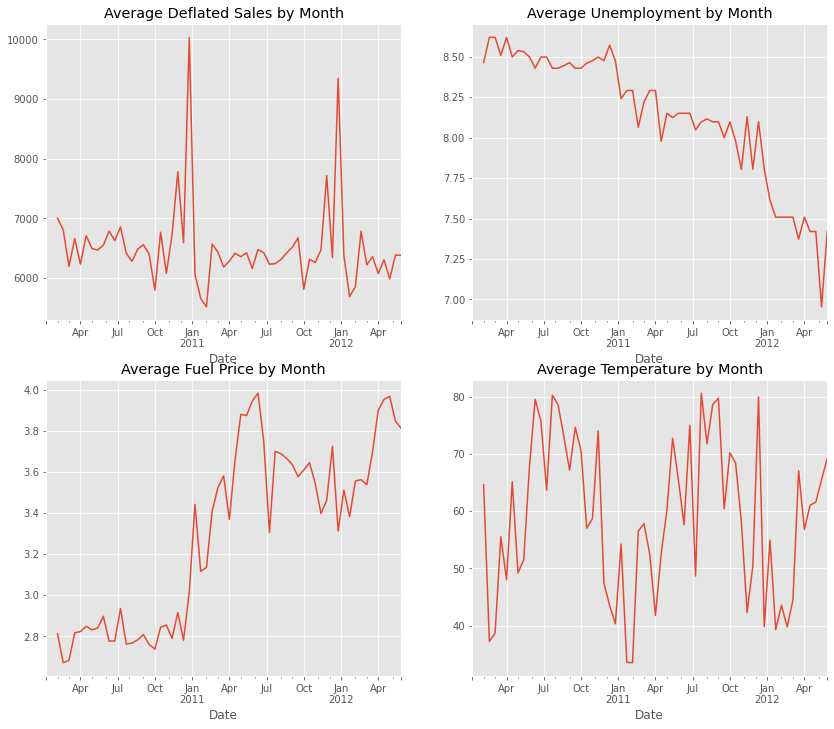

In [71]:
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('2W').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Deflated Sales by Month')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('2W').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Unemployment by Month')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('2W').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Fuel Price by Month')

plt.subplot(2, 2, 4)
X_train.temperature.resample('2W').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Temperature by Month')

### Visualizing Target and Feature Delta

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Average Monthly YoY change - Temperature ')

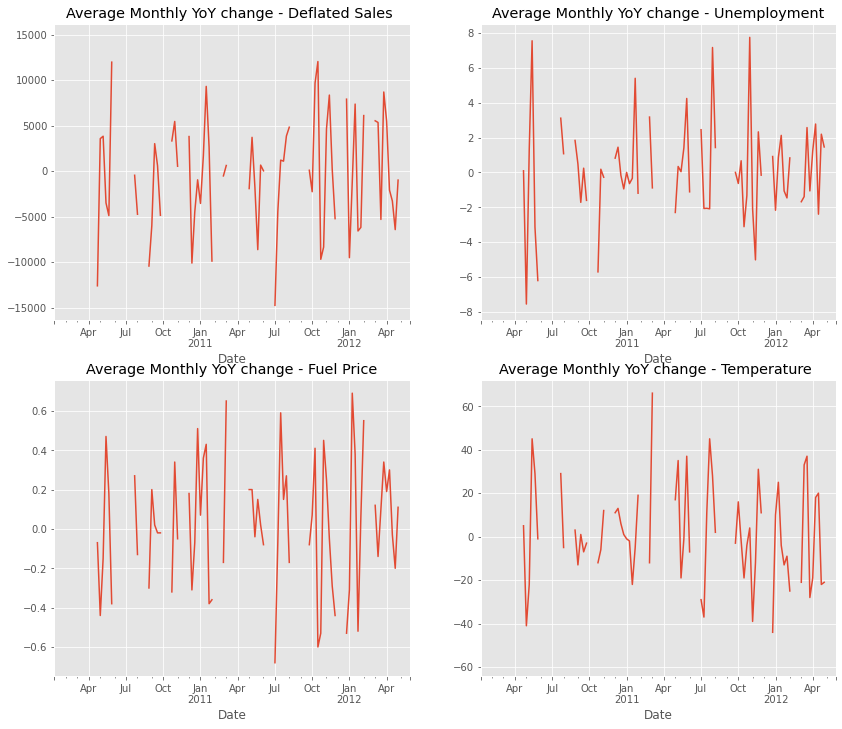

In [72]:
# Year over year changes
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('w').last().diff(2).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Deflated Sales ')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('w').last().diff(2).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Unemployment')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('w').last().diff(2).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Fuel Price')

plt.subplot(2, 2, 4)
X_train.temperature.resample('w').last().diff(2).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Temperature ')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Average Monthly MoM change - Temperature ')

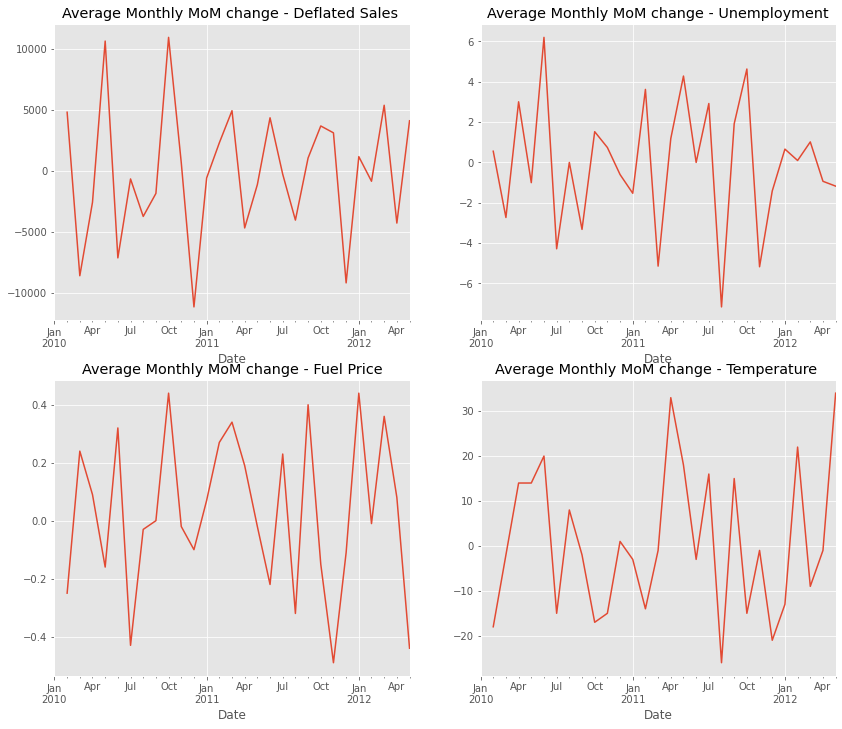

In [73]:
# Month over month changes
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Deflated Sales ')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Unemployment')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Fuel Price')

plt.subplot(2, 2, 4)
X_train.temperature.resample('M').last().diff().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Temperature ')

In [45]:
### Visualizing Target Lags

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: 'DatetimeIndexResampler' object has no attribute 'shift'

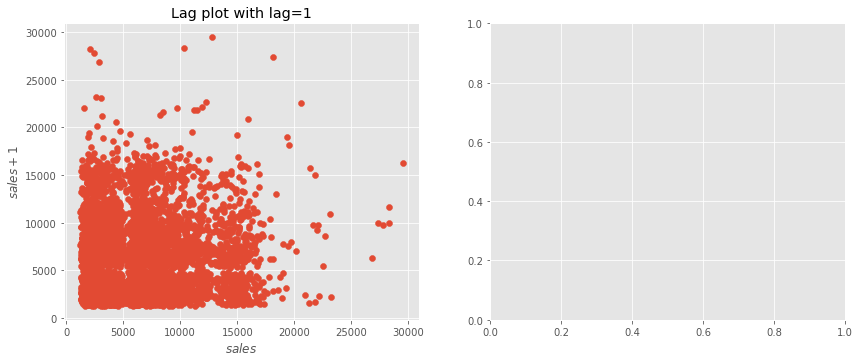

In [78]:
# Various Target Lag plots
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
plt.scatter(X_train.deflated_series, X_train.deflated_series.shift(-1))
plt.xlabel('$sales$')
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
plt.scatter(X_train.deflated_series.resample('M'), X_train.deflated_series.resample('M').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
plt.scatter(X_train.deflated_series.resample('M'), X_train.deflated_series.resample('M').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
plt.scatter(X_train.deflated_series.resample('M'), X_train.deflated_series.resample('M').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

In [108]:
a = X_train[X_train.store_type == 'A']
b = X_train[X_train.store_type == 'B']
c = X_train[X_train.store_type == 'C']

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

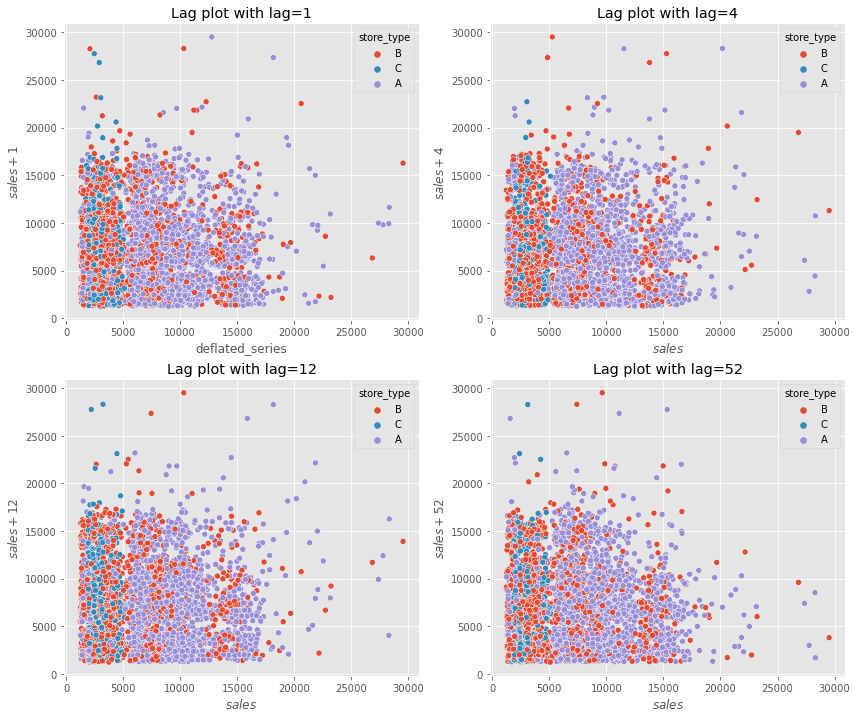

In [105]:
# Various Target Lag plots


plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(X_train.deflated_series, X_train.deflated_series.shift(-1), hue=(X_train.store_type))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(X_train.deflated_series, X_train.deflated_series.shift(-4), hue=(X_train.store_type))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(X_train.deflated_series, X_train.deflated_series.shift(-12), hue=(X_train.store_type))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(X_train.deflated_series, X_train.deflated_series.shift(-52), hue=(X_train.store_type))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

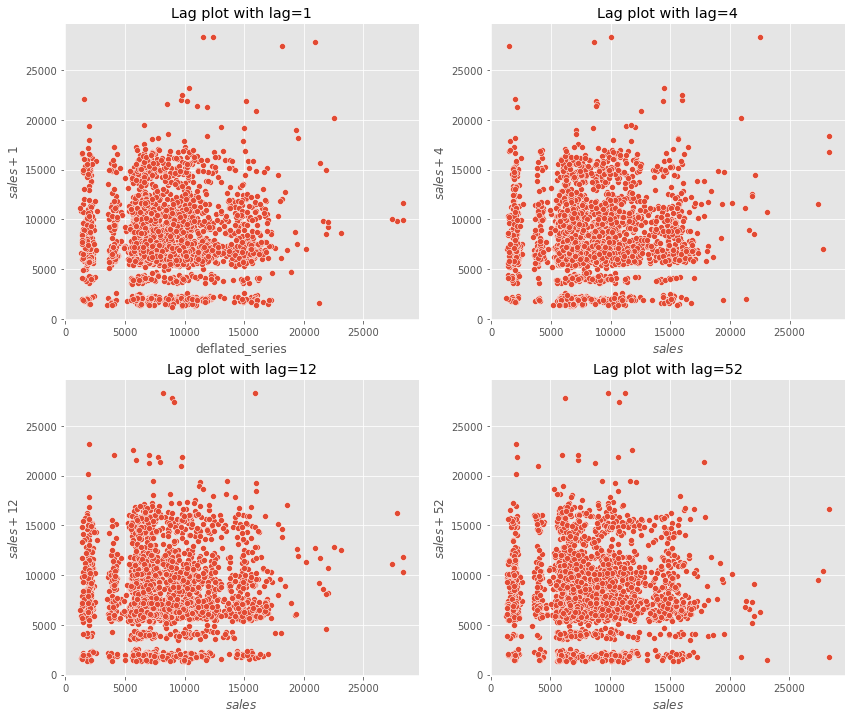

In [109]:
# Various Target Lag plots


plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(a.deflated_series, a.deflated_series.shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(a.deflated_series, a.deflated_series.shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(a.deflated_series, a.deflated_series.shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(a.deflated_series, a.deflated_series.shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

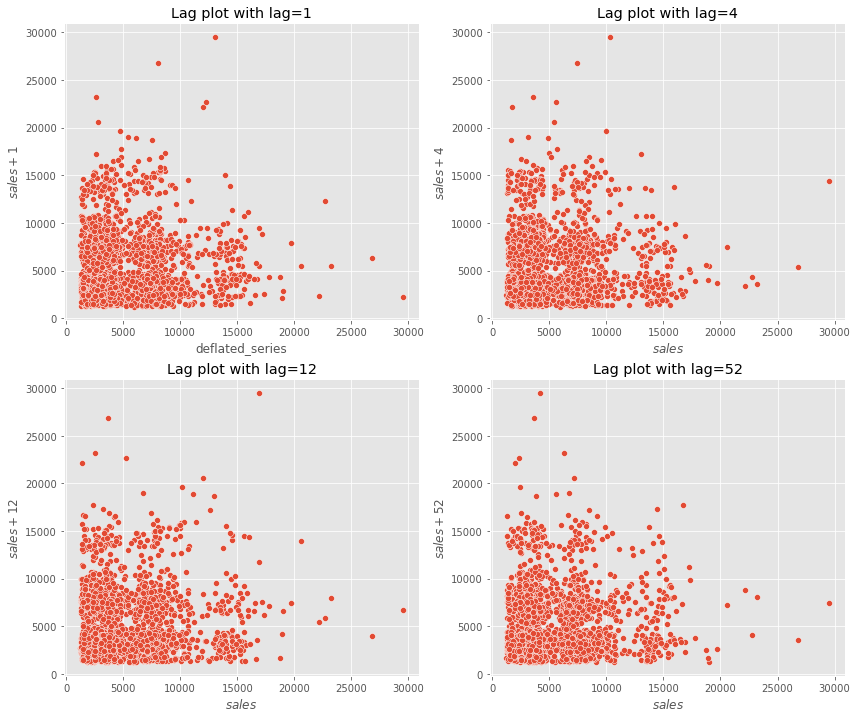

In [110]:
# Various Target Lag plots


plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(b.deflated_series, b.deflated_series.shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(b.deflated_series, b.deflated_series.shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(b.deflated_series, b.deflated_series.shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(b.deflated_series, b.deflated_series.shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

AttributeError: 'float' object has no attribute 'shift'

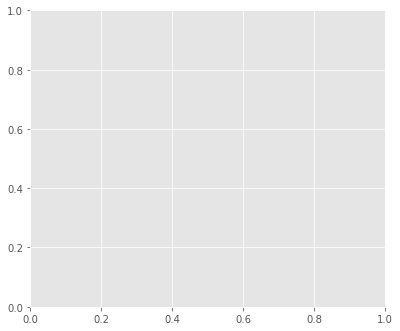

In [112]:
# Various Target Lag plots


plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(c.deflated_series.mean(), c.deflated_series.mean().shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(c.deflated_series, c.deflated_series.shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(c.deflated_series, c.deflated_series.shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(c.deflated_series, c.deflated_series.shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

<IPython.core.display.Javascript object>

ValueError: Using `title` of type `list` is not supported unless `subplots=True` is passed

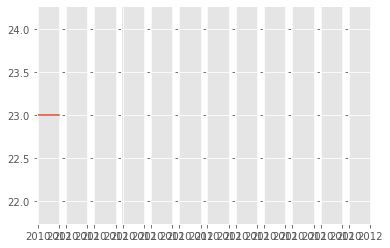

In [79]:
table = X_train.groupby([X_train.index.year, X_train.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)